# Customer Segmentation Analysis with Python


# Chapter 1: Introduction

Imagine you own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.
It is more favorable to advertise to a group of customers who have a higher probability of buying products (With a good spending score) than randomly advertising to everyone.
The dataset is provided by VIJAY CHOUDHARY (Kaggle). 



# Chapter 2: Importing the libraries and dataset

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#importing dataset
dfCustomers = pd.read_csv('./Mall_Customers.csv', sep=',')
dfCustomers.columns = dfCustomers.columns.str.strip()
dfCustomers.columns = dfCustomers.columns.str.replace(' ', '_')
dfCustomers.head()

,CustomerID,Gender,Age,Annual_Income_(k$),Spending_Score_(1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#checking the shape of the dataset
dfCustomers.shape

(200, 5)

- The dataset has 200 rows and 5 columns.

In [5]:
dfCustomers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual_Income_(k$)      200 non-null    int64 
 4   Spending_Score_(1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
dfCustomers.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score_(1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


- There is a mix of categorical and numerical variables.
- Numeric values dominate the dataset.

In [7]:
#checking for null values
dfCustomers.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual_Income_(k$)        0
Spending_Score_(1-100)    0
dtype: int64

- The dataset has no missing values.

<AxesSubplot: >

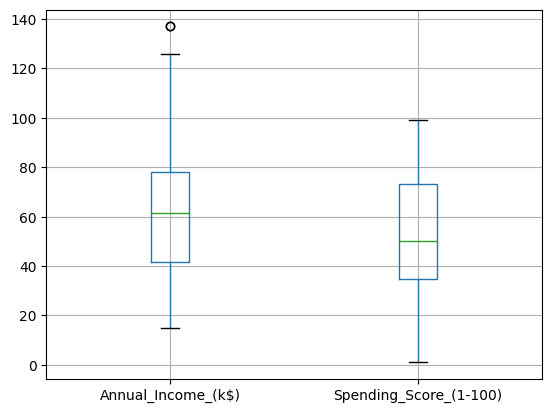

In [8]:
#checking for outliers
dfCustomers.boxplot(['Annual_Income_(k$)','Spending_Score_(1-100)'])

- An outlier exists in Annual Income (k$) column but it is not removed since it is not an error.There are customers who earn more than 100k dollars per year.

# Chapter 3: Hypothesis
### Hypothesis 1: Higher the annual income, higher the spending score.
- The customers with higher annual income spend more money in the mall.
### Hypothesis 2: Younger the age, higher the spending score.
- The customers with younger age spend more money in the mall.

# Chapter 4: Exploratory Data Analysis


<AxesSubplot: xlabel='Gender', ylabel='count'>

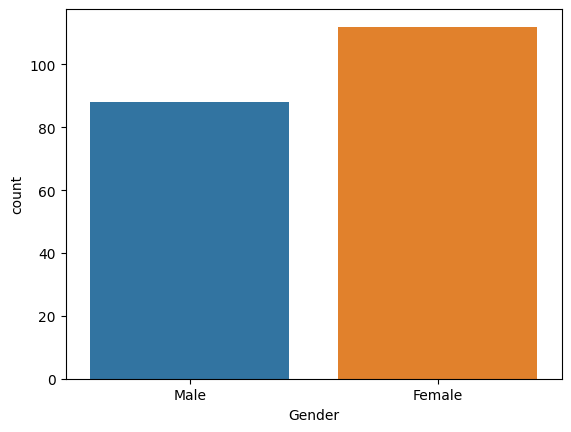

In [9]:
#count plot for gender
import seaborn as sns
sns.countplot(x="Gender", data=dfCustomers)

In [10]:
dfCustomers['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

- More female customers have frequented the mall than male customers.

<AxesSubplot: xlabel='Age', ylabel='Count'>

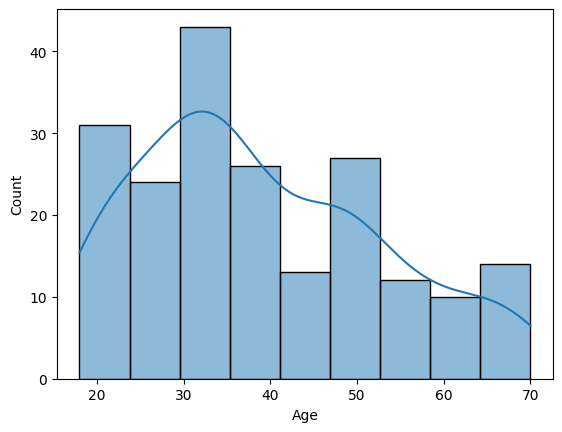

In [11]:
#Age distribution
sns.histplot(dfCustomers['Age'], kde=True)

- More customers are in the age group of 30-40 years.

In [12]:
#Annual Income distribution

<AxesSubplot: xlabel='Annual_Income_(k$)', ylabel='Count'>

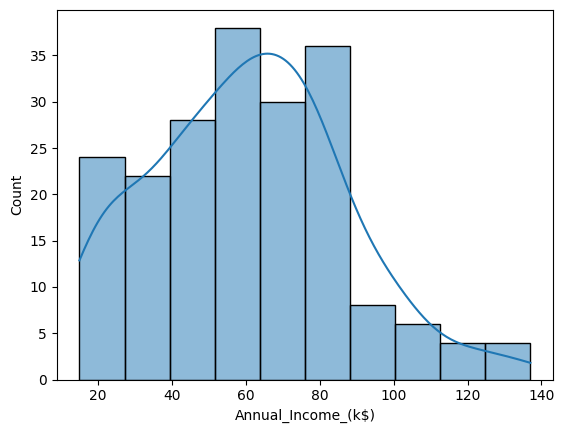

In [13]:
sns.histplot(dfCustomers['Annual_Income_(k$)'],kde=True)

- More customers have an annual income of 60-80k dollars.

<AxesSubplot: xlabel='Spending_Score_(1-100)', ylabel='Count'>

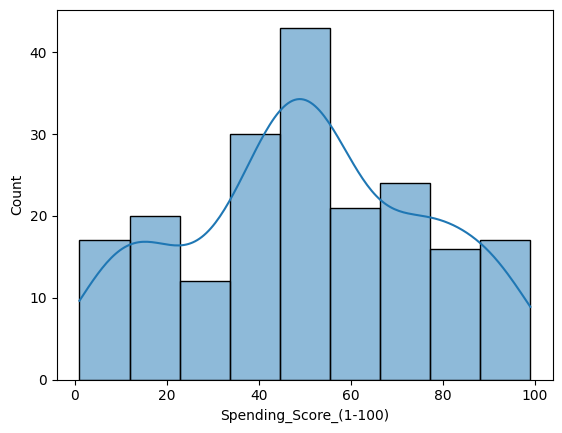

In [16]:
#Spending Score distribution
sns.histplot(dfCustomers['Spending_Score_(1-100)'],kde=True)

- More customers have a spending score of 40-60.

# Chapter 5: Model Building
### Hypothesis 1: Higher the annual income, higher the spending score.
We will use KMeans clustering algorithm to cluster the customers based on their Annual Income and Spending Score.(For Hypothesis 1)

In [14]:
#selecting the columns Annual income and Spending score
income_vs_spendingScore = dfCustomers.iloc[:,[3,4]].values
income_vs_spendingScore[0:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]], dtype=int64)

Text(0, 0.5, 'WCSS')

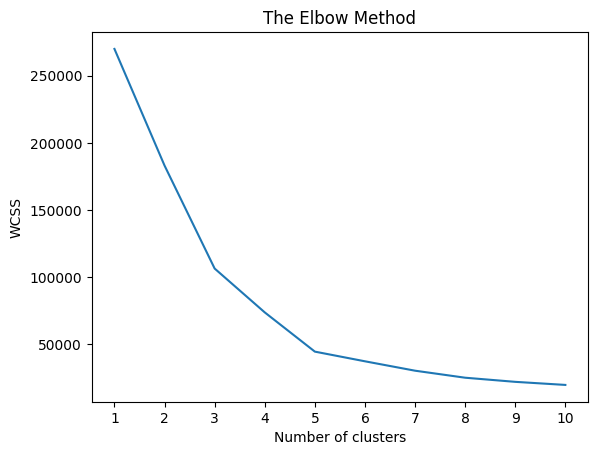

In [17]:
#using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(income_vs_spendingScore)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.xticks(np.arange(1,11,1))
plt.ylabel('WCSS')


The optimal number of clusters can be defined as follow:
- The idea is to define the clusters so that the distance between the data points in a cluster should be minimum while the distance between the data points of different clusters should be maximum.
From the above graph, we can see that the optimal number of clusters should be 5 as the distance between the data points in a cluster is minimum while the distance between the data points of different clusters is maximum.

In [20]:
#applying k-means to the mall dataset
kmeans = KMeans(n_clusters=5 ,random_state=42)
y_kmeans = kmeans.fit_predict(income_vs_spendingScore)

<Figure size 2000x1000 with 0 Axes>

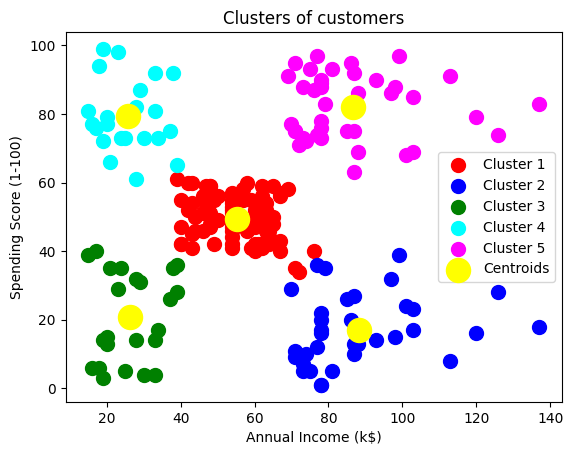

<Figure size 2000x1000 with 0 Axes>

In [23]:
#visualizing the clusters
plt.scatter(income_vs_spendingScore[y_kmeans==0,0],income_vs_spendingScore[y_kmeans==0,1],s=100,c='red',label='Cluster 1')
plt.scatter(income_vs_spendingScore[y_kmeans==1,0],income_vs_spendingScore[y_kmeans==1,1],s=100,c='blue',label='Cluster 2')
plt.scatter(income_vs_spendingScore[y_kmeans==2,0],income_vs_spendingScore[y_kmeans==2,1],s=100,c='green',label='Cluster 3')
plt.scatter(income_vs_spendingScore[y_kmeans==3,0],income_vs_spendingScore[y_kmeans==3,1],s=100,c='cyan',label='Cluster 4')
plt.scatter(income_vs_spendingScore[y_kmeans==4,0],income_vs_spendingScore[y_kmeans==4,1],s=100,c='magenta',label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.figure(figsize=(20,10))


- The customers are divided into 5 groups based on their Annual Income and Spending Score.
- The customers in cluster 1 have medium annual income and medium spending score.
- The customers in cluster 2 high annual income and low spending score.
- The customers in cluster 3 have low annual income and low spending score.
- The customers in cluster 4 have  low annual income and high spending score. 
- The customers in cluster 5 have high annual income and high spending score. 

- Most of the customers are concentrated in cluster 1 and cluster 2.(Target Customers)
### Conclusion:
- **Adverts should be target to customers in cluster 2(medium earners -meduim spending),cluster 5(high earners - low spending) and cluster 3(low income - low spending) since they are potential high spenders.**
- **The customers with high annual income and low spending score show that income is not directly prortional spending.**

### Hypothesis 2: Younger the age, higher the spending score.

In [24]:
#Selecting the columns Age and Spending score
age_vs_spendingScore = dfCustomers.iloc[:,[2,4]].values
age_vs_spendingScore[0:5]

array([[19, 39],
       [21, 81],
       [20,  6],
       [23, 77],
       [31, 40]], dtype=int64)

([<matplotlib.axis.XTick at 0x139923ba310>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

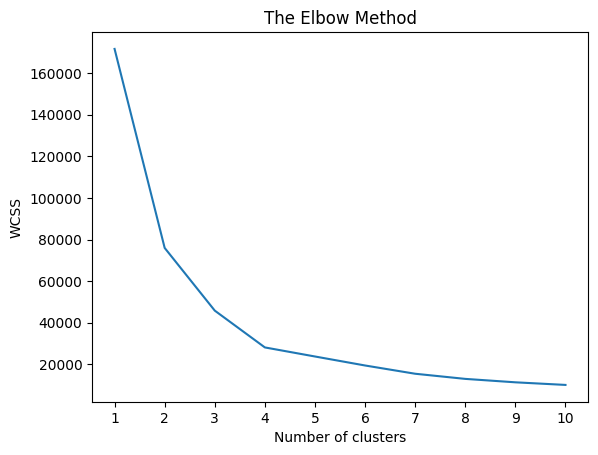

In [25]:
#using the elbow method to find the optimal number of clusters

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(age_vs_spendingScore)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.xticks(np.arange(1,11,1))
plt.ylabel('WCSS')
plt.xticks(np.arange(1,11,1))


In [26]:
#applying k-means to the mall dataset
kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(age_vs_spendingScore)


<Figure size 2000x1000 with 0 Axes>

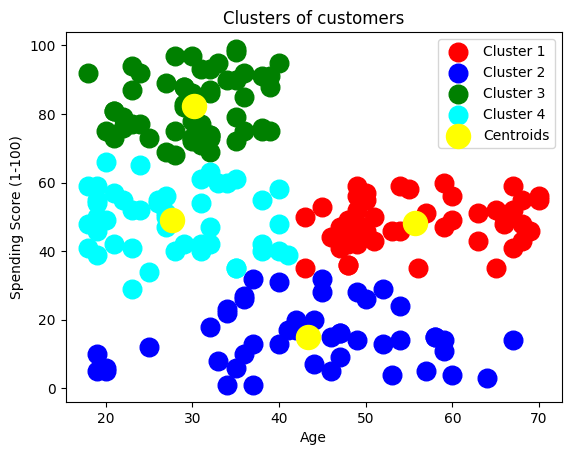

<Figure size 2000x1000 with 0 Axes>

In [27]:
#visualizing the clusters
plt.scatter(age_vs_spendingScore[y_kmeans==0,0],age_vs_spendingScore[y_kmeans==0,1],s=180,c='red',label='Cluster 1')
plt.scatter(age_vs_spendingScore[y_kmeans==1,0],age_vs_spendingScore[y_kmeans==1,1],s=180,c='blue',label='Cluster 2')
plt.scatter(age_vs_spendingScore[y_kmeans==2,0],age_vs_spendingScore[y_kmeans==2,1],s=180,c='green',label='Cluster 3')
plt.scatter(age_vs_spendingScore[y_kmeans==3,0],age_vs_spendingScore[y_kmeans==3,1],s=180,c='cyan',label='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.figure(figsize=(20,10))


- There are fewer young customers with a low spending score.
- Most of the customers with a high spending score are in the age group of 20-40 years.
- Most of the customers with a medium - low spending score are in the age group of 40-60 years.

### Conclusion:
- **The customers with age group of 20-40 years are the best customers for the mall.**
- **The customers with age group of 40-60 years are the potential customers for the mall and should be targeted by adverts.**